Integrantes:
* Macias Hernandez Gerardo Antonio
* Saul Gabriel Castillo Suarez
* Daniel Emiliano Vazquez Amador

In [1]:
from modelos import *
from funciones import *
from optimizadores import AdagradOptimizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm

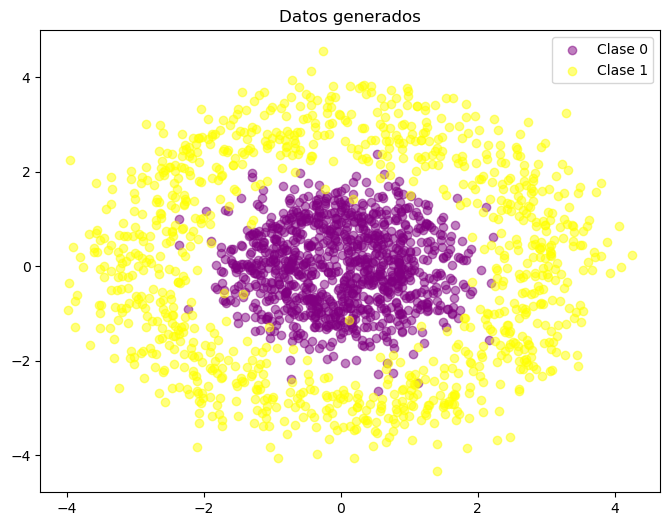

In [2]:
X, y = make_classification(r0=1, r1=2)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X, y = make_classification(r0=1, r1=3)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

plt.figure(figsize=(8,6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:,1], color='purple', label='Clase 0', alpha=0.5)
plt.scatter(X[y == 1][:, 0], X[y == 1][:,1], color='yellow', label='Clase 1', alpha=0.5)
plt.title('Datos generados')
plt.legend()
plt.show()

# Nota:
al parecer mientras menos unidades por capa tengamos, mayor va a ser la presicion al clasificar, parece ser, no estoy muy seguro

In [ ]:
# vamos a dividir por mini lotes
epochs = 200
batch_size = 10
start = 0
end = x_train.shape[0]
lote = 1
#inicializar el gradiente acumulado
grad_acumulado = 0

# Estableces la semilla una vez al inicio
#np.random.seed(42)
# antes inicializamos nuestra clase sequential
f = Sequential(Linear(2,50, "Xavier"), Tanh(), Linear(50,60, "He"), ReLU(), Linear(60,2), Softmax())
criterion = CrossEntropy()
optimizador = AdagradOptimizer(learning_rate=0.1, epsilon=1e-8)

Entrenamiento: 100%|██████████| 200/200 [00:08<00:00, 22.55it/s]


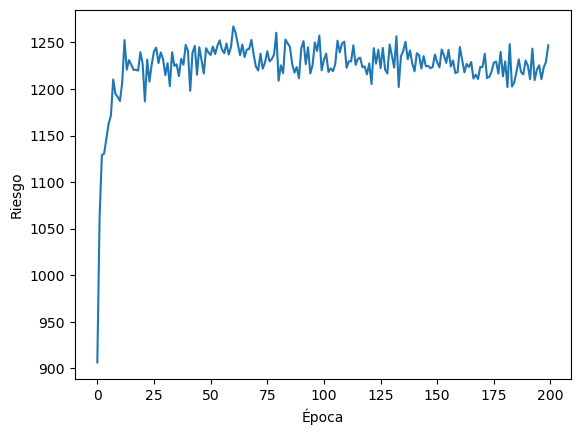

In [4]:
lote = 1
perdida = []

predicciones_por_epoca = []

for epoch in tqdm(range(epochs), desc='Entrenamiento'):
    #perdida_lote = []
    predicciones_por_epoca = []
    epoch_loss = 0

    for i in range(start, end, batch_size):
        # reiniciamos los gradientes antes de cada mini lote
        f.zero_grad()
        
        x = Variable(x_train[i:i+batch_size]) # variable que se va actualizando segun el mini lote
        # hacemos el paso forward
        pred = f(x) # hacemos las predicciones
        error = criterion(y_train[i:i+batch_size], pred) #calculamos el error

        # paso backward
        error.backward()
        #perdida_lote.append(error.out) # guardamos el error por cada lote en una lista
        epoch_loss += error.out
        optimizador.update(f)
        predicciones_por_epoca.append(pred.out)
        lote += 1
    perdida.append(epoch_loss) 
    predicciones_por_epoca = np.vstack(predicciones_por_epoca)

#dibuja la pérdida
plt.plot(perdida)
plt.xlabel('Época')
plt.ylabel('Riesgo')
plt.show()

In [5]:
salida_binaria = np.argmax(predicciones_por_epoca, axis=1)
reporte = classification_report(y_train, salida_binaria)
print(reporte)

              precision    recall  f1-score   support

         0.0       0.32      0.19      0.24       696
         1.0       0.43      0.60      0.50       704

    accuracy                           0.40      1400
   macro avg       0.37      0.39      0.37      1400
weighted avg       0.37      0.40      0.37      1400



In [6]:
x_t = Variable(x_test)
r = f(x_t).argmax()
print(classification_report(y_test, r))

              precision    recall  f1-score   support

         0.0       0.37      0.24      0.29       304
         1.0       0.43      0.58      0.49       296

    accuracy                           0.41       600
   macro avg       0.40      0.41      0.39       600
weighted avg       0.40      0.41      0.39       600



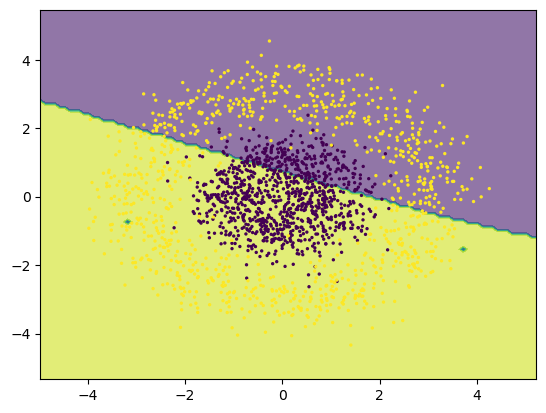

In [7]:
draw_regions(f, X,y)
plt.show()